In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt


#import data
path = "/content/drive/MyDrive/CSV_files/iris.data.csv"
data = pd.read_csv(path)

In [ ]:
sepalLen = data.loc[:,'SepalLen']
sepalWid = data.loc[:,'SepalWid']
petalLen = data.loc[:,'PetalLen']
petalWid = data.loc[:,'petalWid']

ActualFlower = data.loc[:,'Flower']

FlowerX = [sepalLen, petalLen]
FlowerY = [sepalWid, petalWid]


In [ ]:
def LinearRegressionCross(x,y,L):
  w = [0,0] #initialize at start
  n = len(x[0])
  for i in range(len(x[0])):
    y_pred = w[0]*x[0] + w[1]*x[1] # ybar = mx+b --> mx+b+e for the noise
    Data_m =  sum(x[0]*-abs(y[0] - y_pred)) # partial derivative respect to m
    Data_b =  sum(x[1]*-abs(y[1] - y_pred))   # partial derivative respect to c

    #perform Gradient Descent
    w[0] = w[0]- L*Data_m #update weights
    w[1] = w[1]-L*Data_b
    

  return w

  

def LinearRegressionMean(x,y,L):
  w = [0,0] #initialize at start
  n = len(x[0])
  for i in range(len(x[0])):
    y_pred = w[0]*x[0] + w[1]*x[1] # ybar = mx+b --> mx+b+e for the noise
    Data_m = (-2/n) * sum(x[0]*(y[0] - y_pred)) # partial derivative respect to m
    Data_b = (-2/n) * sum(x[1]*(y[1] - y_pred))   # partial derivative respect to b

    #perform Gradient Descent
    w[0] = w[0]- L*Data_m #update weights
    w[1] = w[1]-L*Data_b
   
  
  return w

In [ ]:


NewWeightsMean = LinearRegressionMean(FlowerX,FlowerY, 0.001) 
NewWeightsCross = LinearRegressionCross(FlowerX,FlowerY,0.001)
print("MeanSquared: ", NewWeightsMean)
print("CrossEntropy: ", NewWeightsCross)

#Linear regression is only predicting the wid of the sepal and Petal
#in order to predict the flower we need to use Logistical Regression


MeanSquared:  [1.0587639661551642, -0.9125311648793276]
CrossEntropy:  [5.573278861347877e+139, 3.8479651400943493e+139]


In [ ]:




#regression mean from scratch
# to demonstrate knowledge of both mean and cross mathematics part. Classification itself presents itself a challenge. Not enough web sources for multinomial but binomial plausible
def logisticalRegressionMean(w,x,L):
    n = len(x[0])
    for i in range(len(X_train)):
      z = w[0]*x[0]+w[1]*x[1] + w[2]*x[2] + w[3]*x[3]
      y_pred = 1/(1+math.exp(-1*z))  
      loss1 = -2/n*(y[i] - y_pred)*y_pred*(1-y_pred)*x[0] 
      loss2 = -2/n*(y[i] - y_pred)*y_pred*(1-y_pred)*x[1] 
      loss3 = -2/n*(y[i] - y_pred)*y_pred*(1-y_pred)*x[2] 
      loss4 = -2/n*(y[i] - y_pred)*y_pred*(1-y_pred)*x[3] 
      w[0] = w[0]- L*loss1
      w[1] = w[1]-L*loss2
      w[2] = w[2]-L*loss3
      w[3] = w[2]-L*loss3


def logisticalRegressionCross(w,x,L):
    n = len(x[0])
    for i in range(len(X_train)):
      z = w[0]*x[0]+w[1]*x[1] + w[2]*x[2] + w[3]*x[3]
      y_pred = 1/(1+math.exp(-1*z))  
      loss1 = sum(-abs((y[i] - y_pred)*y_pred*(1-y_pred)*x[0]))
      loss2 = sum(-abs((y[i] - y_pred)*y_pred*(1-y_pred)*x[1])) 
      loss3 = sum(-abs((y[i] - y_pred)*y_pred*(1-y_pred)*x[2])) 
      loss4 = sum(-abs((y[i] - y_pred)*y_pred*(1-y_pred)*x[3]))
      w[0] = w[0]- L*loss1
      w[1] = w[1]-L*loss2
      w[2] = w[2]-L*loss3
      w[3] = w[2]-L*loss3


#ignore above





In [ ]:
x = data.iloc[:,:-1]

y = data.iloc[:, -1]

print(x)



     SepalLen  SepalWid  PetalLen  petalWid
0         5.1       3.5       1.4       0.2
1         4.9       3.0       1.4       0.2
2         4.7       3.2       1.3       0.2
3         4.6       3.1       1.5       0.2
4         5.0       3.6       1.4       0.2
..        ...       ...       ...       ...
145       6.7       3.0       5.2       2.3
146       6.3       2.5       5.0       1.9
147       6.5       3.0       5.2       2.0
148       6.2       3.4       5.4       2.3
149       5.9       3.0       5.1       1.8

[150 rows x 4 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#load iris dataset using seaborn

data = sns.load_dataset("iris")
data.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#training set

x = data.iloc[:,:-1]
y = data.iloc[:, -1]

print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


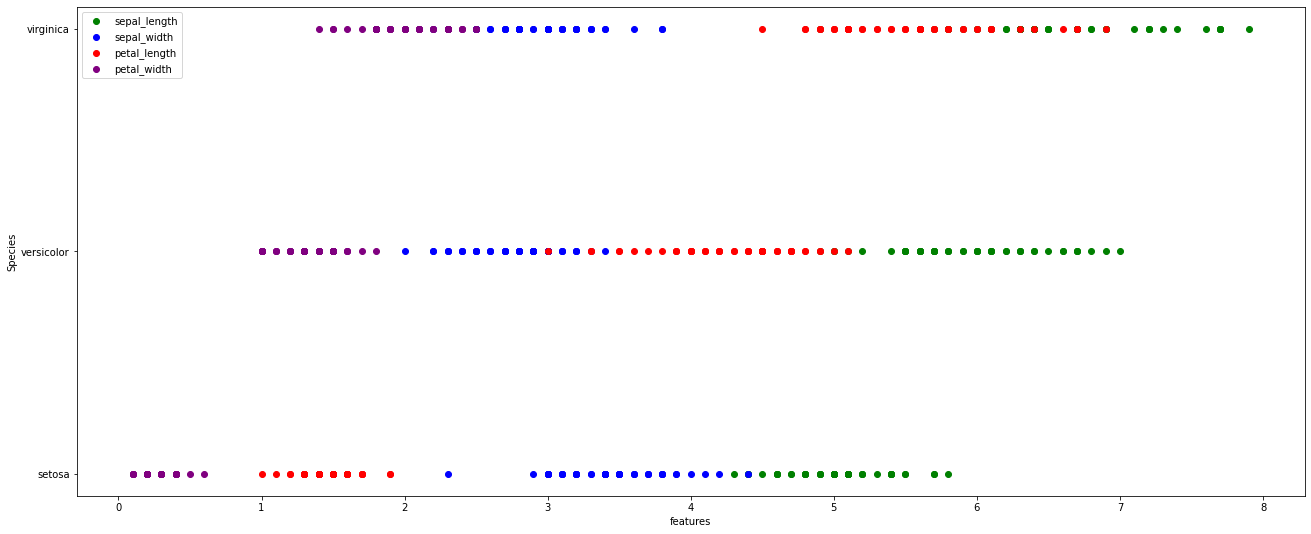

In [ ]:
#plot

plt.xlabel('features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color = 'green', label = 'sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color = 'blue', label = 'sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color = 'red', label = 'petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color = 'purple', label = 'petal_width')

plt.legend()
plt.show()


In [ ]:
#split data 80% training 20% testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)



In [ ]:
#train

model = LogisticRegression()
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print(prediction) # all predictions for all test data

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#check accuracy

print(classification_report(y_test, prediction)) 

#model is 100% accurate best possible value for prediction is 1.0
#multinomial is possible using the sklearn library making the classifcation issue negligble


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

